In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/-cryptocurrency-historical-prices-dataset/dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:

# Veri setlerini yükleme
datasets = {
    "crypto_prices": "/kaggle/input/-cryptocurrency-historical-prices-dataset/dataset.csv",
    "credit_train": "/kaggle/input/my-dataset/credit_train.csv",
    "credit_risk1": "/kaggle/input/d/essouvenirsama/credit-risk-dataset/credit_risk_dataset.csv",
    "credit_risk2": "/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv",
    "crypto_data": "/kaggle/input/cryptocurrencies-dataset/crypto_data_updated_13_november.csv",
    "finance_data": "/kaggle/input/finance-data/Finance_data.csv",
    "loan_data": "/kaggle/input/loan-application-data/df1_loan.csv",
    "ratail_data": "/kaggle/input/retaildataset/sales data-set.csv",
    "crypto_currency":"/kaggle/input/cryptocurrency-dataset-2021-395-types-of-crypto/Cryptocurrency_Dataset_2023.csv"
    
}

# Her veri setinin sütun isimlerini yazdırma
for name, path in datasets.items():
    data = pd.read_csv(path)
    print(f"{name} sütun isimleri: {data.columns.tolist()}\n")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/-cryptocurrency-historical-prices-dataset/dataset.csv'

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelin eğitilmesi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminlerin yapılması
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')



Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Accuracy: 0.8195294234691339
Confusion Matrix: 
[[ 1100  3501]
 [  127 15375]]


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelin eğitilmesi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminlerin yapılması
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Accuracy: 0.8195294234691339
Confusion Matrix: 
[[ 1100  3501]
 [  127 15375]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelin eğitilmesi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminlerin yapılması
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Accuracy: 0.8195294234691339
Confusion Matrix: 
[[ 1100  3501]
 [  127 15375]]


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelin eğitilmesi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminlerin yapılması
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Accuracy: 0.8195294234691339
Confusion Matrix: 
[[ 1100  3501]
 [  127 15375]]


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Hiperparametre aralıkları
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle modelin eğitilmesi
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Tahminlerin yapılması ve modelin değerlendirilmesi
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'En iyi Doğruluk: {accuracy}')
print(f'En iyi Karışıklık Matrisi: \n{conf_matrix}')
print(f'En iyi Parametreler: {grid_search.best_params_}')


NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hiperparametre aralıkları
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle modelin eğitilmesi
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Tahminlerin yapılması ve modelin değerlendirilmesi
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'En iyi Doğruluk: {accuracy}')
print(f'En iyi Karışıklık Matrisi: \n{conf_matrix}')
print(f'En iyi Parametreler: {grid_search.best_params_}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hiperparametre aralıkları
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# RandomizedSearchCV kullanarak en iyi parametreleri bulma
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# En iyi parametrelerle modelin eğitilmesi
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Tahminlerin yapılması ve modelin değerlendirilmesi
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'En iyi Doğruluk: {accuracy}')
print(f'En iyi Karışıklık Matrisi: \n{conf_matrix}')
print(f'En iyi Parametreler: {random_search.best_params_}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi Doğruluk: 0.8203750683977515
En iyi Karışıklık Matrisi: 
[[ 1041  3560]
 [   51 15451]]
En iyi Parametreler: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'mi

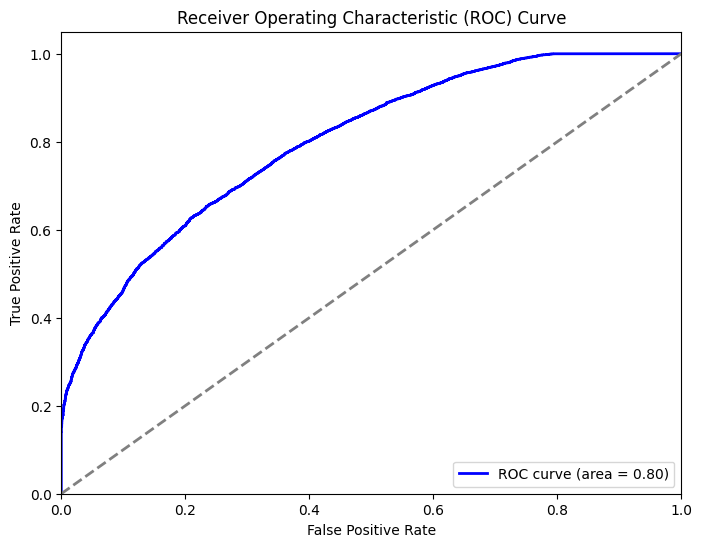

ROC AUC Skoru: 0.7998489639676307


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Etiketleri binary değerlere dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model tahmin olasılıklarının alınması
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Skoru: {roc_auc}')



Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi Doğruluk: 0.8203750683977515
En iyi Karışıklık Matrisi: 
[[ 1041  3560]
 [   51 15451]]
En iyi Parametreler: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'mi

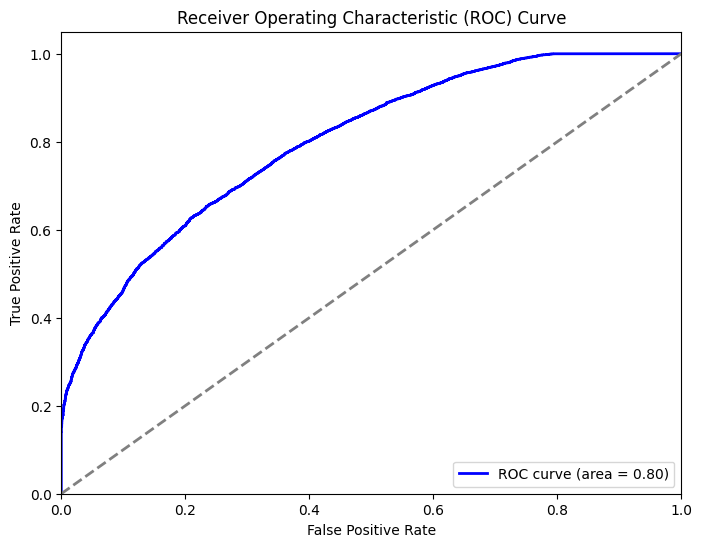

ROC AUC Skoru: 0.7998489639676307


IndexError: index 32 is out of bounds for axis 0 with size 16

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=288; total time=  54.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=174; total time=  19.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=174; total time=  18.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=203; total time=  38.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=101; total time=  21.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=229; total time=  43.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=229; total time=  42.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=157; total time=  31.9s
[CV] END max_depth=20, max_featu

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Sütun adlarını kaydetme
column_names = X.columns

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etiketleri binary değerlere dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hiperparametre aralıkları
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# RandomizedSearchCV kullanarak en iyi parametreleri bulma
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_encoded)

# En iyi parametrelerle modelin eğitilmesi
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train_encoded)

# Tahminlerin yapılması ve modelin değerlendirilmesi
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'En iyi Doğruluk: {accuracy}')
print(f'En iyi Karışıklık Matrisi: \n{conf_matrix}')
print(f'En iyi Parametreler: {random_search.best_params_}')

# Model tahmin olasılıklarının alınması
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Skoru: {roc_auc}')

# Özelliklerin önem düzeyleri
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = [column_names[i] for i in indices]

# Özelliklerin önem düzeylerini görselleştirme
plt.figure(figsize=(12, 6))
plt.title('Özelliklerin Önem Düzeyleri')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features, rotation=90)
plt.tight_layout()
plt.show()

print('Özelliklerin Önem Düzeyleri:')
for f in range(len(importances)):
    print(f'{features[f]}: {importances[indices[f]]}')


Eksik değerler (X):
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Eksik değerler (y):
514

Eksik değerler doldurulduktan sonra (X):
0

Eksik değerler doldurulduktan sonra (y):
0
Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi Doğruluk: 0.8203750683977515
En iyi Karışıklık Matrisi: 
[[ 1041  3560]
 [   51 15451]]
En iyi Parametreler: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'mi

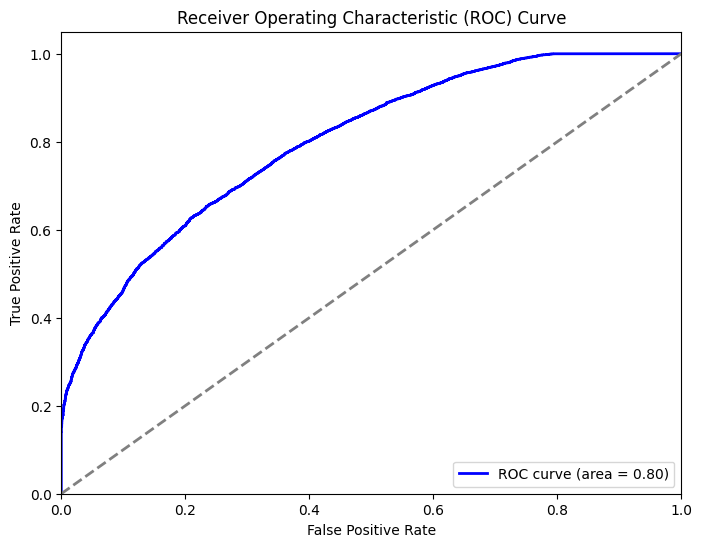

ROC AUC Skoru: 0.7998489639676307


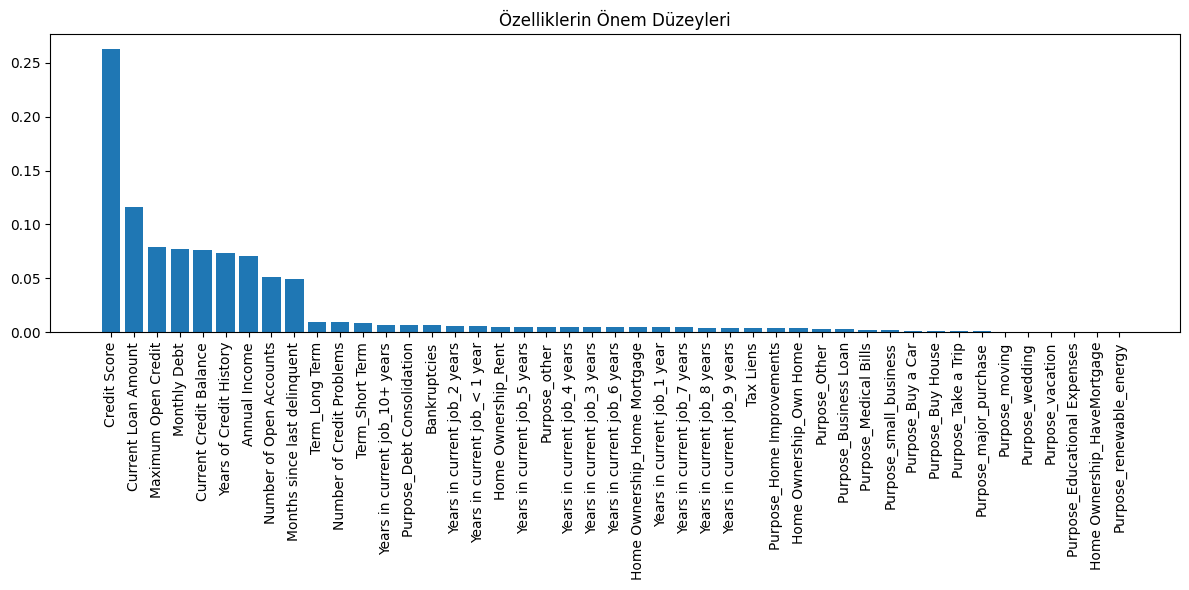

Özelliklerin Önem Düzeyleri:
Credit Score: 0.2632017386888741
Current Loan Amount: 0.11657588275507529
Maximum Open Credit: 0.07866569270419517
Monthly Debt: 0.07772160538993315
Current Credit Balance: 0.07653490795103791
Years of Credit History: 0.0733114159337473
Annual Income: 0.07110188092114632
Number of Open Accounts: 0.0513753276877834
Months since last delinquent: 0.04954933797582777
Term_Long Term: 0.009526919131773552
Number of Credit Problems: 0.009467514263603734
Term_Short Term: 0.008324087737909045
Years in current job_10+ years: 0.007213627223479717
Purpose_Debt Consolidation: 0.007145450538931176
Bankruptcies: 0.006943118830098403
Years in current job_2 years: 0.005668959104619499
Years in current job_< 1 year: 0.005452127389595283
Home Ownership_Rent: 0.005347293974044215
Years in current job_5 years: 0.0050950722735769545
Purpose_other: 0.005031053548851902
Years in current job_4 years: 0.005013649155538953
Years in current job_3 years: 0.004875442410928309
Years in c

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt

# Verilerin yüklenmesi
data = pd.read_csv('/kaggle/input/my-dataset/credit_train.csv')

# Hedef değişkeni ve özellik sütunlarını belirleme
X = data.drop(columns=['Loan Status', 'Loan ID', 'Customer ID'])
y = data['Loan Status']

# Sütun adlarını kaydetme
original_column_names = X.columns

# Eksik değerleri kontrol etme ve doldurma
print("Eksik değerler (X):")
print(X.isnull().sum())

print("\nEksik değerler (y):")
print(y.isnull().sum())

# Kategorik değişkenleri dönüştürme
X = pd.get_dummies(X)

# Yeni sütun adlarını kaydetme
column_names = X.columns

# Eksik değerlerin doldurulması (hem X hem de y için)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Eksik değerleri kontrol ettikten sonra NaN olup olmadığını kontrol etme
print("\nEksik değerler doldurulduktan sonra (X):")
print(pd.DataFrame(X).isnull().sum().sum())

print("\nEksik değerler doldurulduktan sonra (y):")
print(pd.DataFrame(y).isnull().sum().sum())

# Eğitim ve test setlerinin oluşturulması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verilerin ölçeklendirilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etiketleri binary değerlere dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hiperparametre aralıkları
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# RandomizedSearchCV kullanarak en iyi parametreleri bulma
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train_encoded)

# En iyi parametrelerle modelin eğitilmesi
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train_encoded)

# Tahminlerin yapılması ve modelin değerlendirilmesi
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'En iyi Doğruluk: {accuracy}')
print(f'En iyi Karışıklık Matrisi: \n{conf_matrix}')
print(f'En iyi Parametreler: {random_search.best_params_}')

# Model tahmin olasılıklarının alınması
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ROC eğrisi hesaplama
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

# ROC eğrisinin çizilmesi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Skoru: {roc_auc}')

# Özelliklerin önem düzeyleri
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = [column_names[i] for i in indices]

# Özelliklerin önem düzeylerini görselleştirme
plt.figure(figsize=(12, 6))
plt.title('Özelliklerin Önem Düzeyleri')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features, rotation=90)
plt.tight_layout()
plt.show()

print('Özelliklerin Önem Düzeyleri:')
for f in range(len(importances)):
    print(f'{features[f]}: {importances[indices[f]]}')


In [4]:
import os
import pickle

# Modelinizi eğittiğiniz kısımda en iyi modeli best_model olarak kabul edelim
# Örneğin:
# best_model = RandomForestClassifier(...).fit(X_train, y_train)

# Kaydedilecek dizini kontrol edin veya oluşturun
save_dir = os.path.expanduser("~/model_saves")
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Modeli kaydet
model_path = os.path.join(save_dir, 'best_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

# Scaler'ı kaydet (eğer scaler kullanıyorsanız)
scaler_path = os.path.join(save_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Model ve scaler {save_dir} dizinine kaydedildi.")


NameError: name 'best_model' is not defined